In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_data[0].shape,train_labels[0].shape

((28, 28), ())

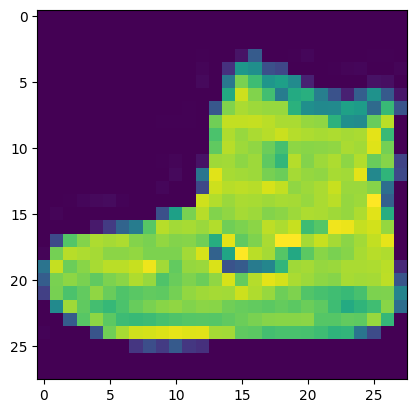

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

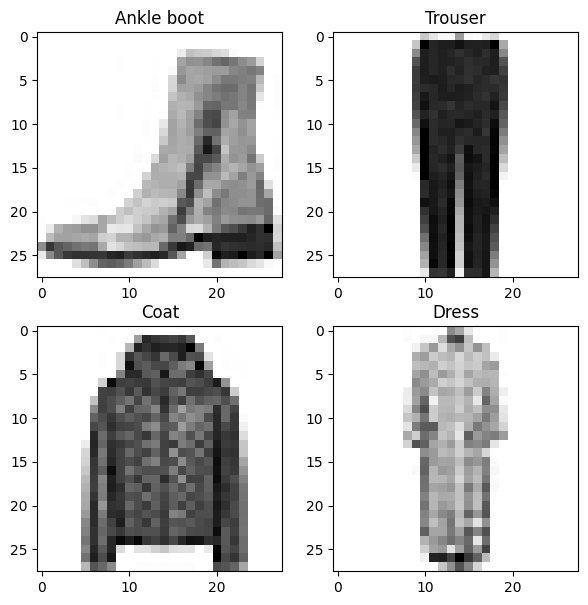

In [ ]:
#visualising data
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])


In [ ]:
tf.random.set_seed(42)

fashion_model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

fashion_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics="accuracy")

non_norm_history=fashion_model.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 19s 7ms/step - loss: 2.3646 - accuracy: 0.0983 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3029 - val_accurac

In [ ]:
# normalising the data
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [ ]:
#training the model over normalised data

tf.random.set_seed(42)

fashion_model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

fashion_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics="accuracy")

norm_history=fashion_model_2.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3623 - accuracy: 0.4920 - val_loss: 1.1126 - val_accuracy: 0.5799
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0303 - accuracy: 0.5957 - val_loss: 1.0026 - val_accuracy: 0.5902
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9435 - accuracy: 0.6257 - val_loss: 0.9211 - val_accuracy: 0.6370
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8708 - accuracy: 0.6712 - val_loss: 0.8016 - val_accuracy: 0.7321
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7352 - accuracy: 0.7552 - val_loss: 0.7151 - val_accuracy: 0.7576
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6820 - accuracy: 0.7669 - val_loss: 0.6992 - val_accuracy: 0.7621
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6543 - accuracy: 0.7745 - val_loss: 0.6804 - val_accuracy:

<Axes: title={'center': 'normalized data'}>

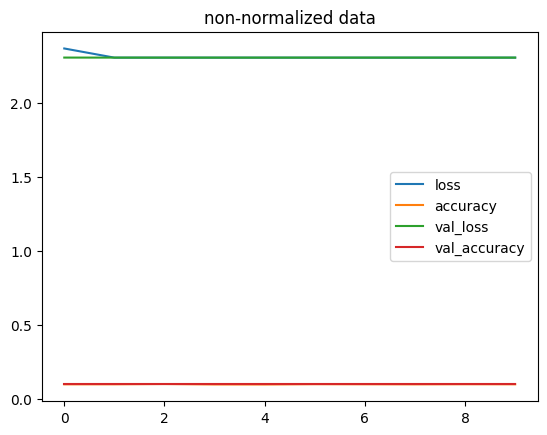

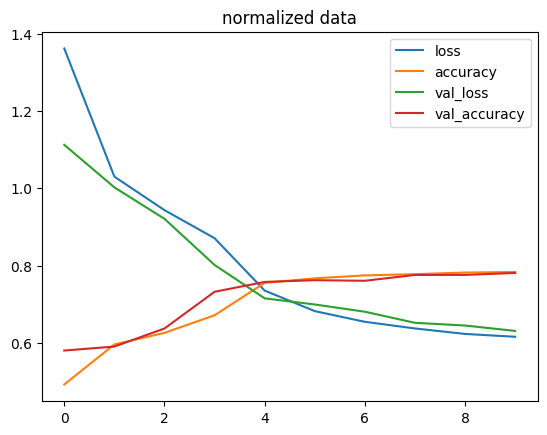

In [ ]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="non-normalized data")
pd.DataFrame(norm_history.history).plot(title="normalized data")

In [ ]:
#finding the best learning rate

tf.random.set_seed(42)

fashion_model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

fashion_model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics="accuracy")

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

lr_history=fashion_model_3.fit(train_data_norm,train_labels,epochs=40,validation_data=(test_data_norm,test_labels),callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1715 - accuracy: 0.5709 - val_loss: 0.7392 - val_accuracy: 0.7362 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6464 - accuracy: 0.7708 - val_loss: 0.6280 - val_accuracy: 0.7770 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5710 - accuracy: 0.7953 - val_loss: 0.5768 - val_accuracy: 0.7920 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5362 - accuracy: 0.8085 - val_loss: 0.5667 - val_accuracy: 0.7994 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5209 - accuracy: 0.8147 - val_loss: 0.5445 - val_accuracy: 0.8140 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5105 - accuracy: 0.8199 - val_loss: 0.5577 - val_accuracy: 0.7994 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0, 0.5, 'loss')

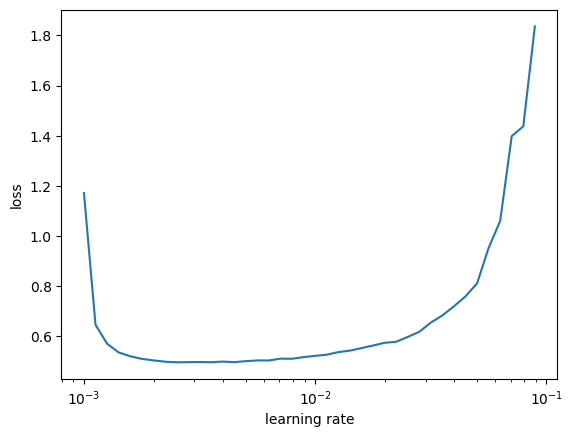

In [ ]:
lrs=1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,lr_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")

In [ ]:
tf.random.set_seed(42)

fashion_model_4=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

fashion_model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(lr=0.001),
                      metrics="accuracy")

history=fashion_model_4.fit(train_data_norm,train_labels,epochs=20,validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1671 - accuracy: 0.6097 - val_loss: 0.8009 - val_accuracy: 0.7431
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7344 - accuracy: 0.7616 - val_loss: 0.7171 - val_accuracy: 0.7616
Epoch 3/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6758 - accuracy: 0.7740 - val_loss: 0.6857 - val_accuracy: 0.7692
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6505 - accuracy: 0.7789 - val_loss: 0.6760 - val_accuracy: 0.7710
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6357 - accuracy: 0.7825 - val_loss: 0.6847 - val_accuracy: 0.7674
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6237 - accuracy: 0.7869 - val_loss: 0.6558 - val_accuracy: 0.7781
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6173 - accuracy: 0.7885 - val_loss: 0.6587 - val_accuracy:

In [15]:
y_prob=fashion_model_4.predict(test_data_norm)
y_pred=y_prob.argmax(axis=1)
y_pred

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [16]:
# confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,y_pred=y_pred)

array([[763,  18,  26,  81,   2,   2,  99,   0,   9,   0],
       [  7, 936,   2,  47,   1,   0,   7,   0,   0,   0],
       [ 23,   1, 623,  42, 157,   0, 149,   0,   5,   0],
       [ 24,  44,  23, 841,  28,   2,  34,   0,   4,   0],
       [  4,   0,  90,  81, 692,   1, 125,   0,   7,   0],
       [  1,   0,   0,   1,   0, 882,   1,  51,  13,  51],
       [192,   8, 106,  64, 125,   0, 489,   0,  16,   0],
       [  0,   0,   0,   0,   0,  59,   0, 895,   0,  46],
       [  2,   1,   2,  10,   8,  26,  57,   4, 890,   0],
       [  1,   0,   0,   0,   0,  41,   0,  41,   0, 917]])